In [12]:
import numpy
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import datetime

sess = tf.InteractiveSession()
x = tf.placeholder("float" , shape = [None , 28 , 28 , 1])

y_ = tf.placeholder("float" , shape = [None, 10])


NameError: name 'InteractiveSession' is not defined

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/" ,one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
tf.reset_default_graph()



sess = tf.InteractiveSession()
x = tf.placeholder("float" , shape = [None , 28 , 28 , 1])

y_ = tf.placeholder("float" , shape = [None, 10])

NameError: name 'InteractiveSession' is not defined

In [ ]:
w_convl = tf.Variable(tf.truncated_normal([5,5,1,32] , stddev = 0.1))
b_convl = tf.Variable(tf.constant(.1 , shape = [32]))

In [ ]:
print(x)
print(w_convl)
h_convl = tf.nn.conv2d(input = x , filter = w_convl, strides = [1,1,1,1] , padding = "SAME") + b_convl
h_convl = tf.nn.relu(h_convl)
h_pool1 = tf.nn.max_pool(h_convl , ksize = [1 , 2 ,2 , 1 ] , strides = [1, 2, 2, 1 ] , padding = "SAME")

In [ ]:
def conv2d(x, w):
  return tf.nn.conv2d(input = x , filter = w, strides = [1,1,1,1] , padding = "SAME")

def max_pool_2x2(x):
  return tf.nn.max_pool(x , ksize = [1 , 2 ,2 , 1 ] , strides = [1, 2, 2, 1 ] , padding = "SAME")

In [ ]:
#Second Conv and pool layers

w_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64] , stddev = 0.1))
b_conv2 = tf.Variable(tf.constant(.1, shape = [64]))

h_conv2 = tf.nn.relu(conv2d(h_pool1 , w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#First fully connected layer


w_fcl = tf.Variable(tf.truncated_normal([7*7*64, 1024], stddev = 0.1))
b_fcl = tf.Variable(tf.constant(.1 , shape = [1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1 , 7*7*64])
h_fcl = tf.nn.relu(tf.matmul(h_pool2_flat , w_fcl) + b_fcl)

                    
#Output layer

keep_prob = tf.placeholder("float")
h_fcl_drop = tf.nn.dropout(h_fcl, keep_prob )

#Second Fully Connected Layer

w_fc2 = tf.Variable(tf.truncated_normal([1024, 10] , stddev = 0.1))
b_fc2 = tf.Variable(tf.constant(.1 , shape = [10]))
              
#Final Layer

y = tf.matmul(h_fcl_drop , w_fc2) + b_fc2

In [ ]:
crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_ , logits = y))

In [7]:
trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)

NameError: name 'crossEntropyLoss' is not defined

In [8]:
#Steps for Calculating Accuracy

correct_prediction = tf.equal(tf.argmax(y,1) , tf.argmax(y_ , 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction ,  'float'))

NameError: name 'y' is not defined

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
tf.summary.scalar('Cross Entropy Loss' , crossEntropyLoss)
tf.summary.scalar('Accuracy' , accuracy)
merged = tf.summary.merge_all()
logdir = 'tensorboard/' + datetime.datetime.now().strftime("\Y\m\d - \h\m\s")

writer = tf.summary.FileWriter(logdir, sess.graph)


INFO:tensorflow:Summary name Cross Entropy Loss is illegal; using Cross_Entropy_Loss instead.


(1, 784)
Tensor("Reshape_1:0", shape=(1, 28, 28, 1), dtype=float32)


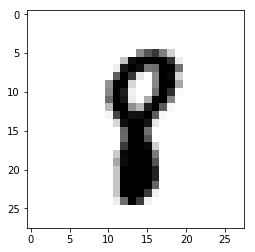

In [ ]:
b = mnist.train.next_batch(1)
print(b[0].shape) #b[0] contains the image
image = tf.reshape(b[0],  [-1,28,28,1])
print(image)
my_img = image.eval()
my_i = my_img.squeeze()
plt.imshow(my_i, cmap = "gray_r")
plt.show()

In [ ]:
batchSize = 50
for i in range(1,1001):
  batch = mnist.train.next_batch(batchSize)
  trainingInputs = batch[0].reshape(batchSize , 28 , 28 ,1 )
  trainingLabels = batch[1]
  if i%10 == 0:
    summary = sess.run(merged , {x: trainingInputs ,  y_ : trainingLabels , keep_prob: 1.0})
    writer.add_summary(summary ,1 )
  if i%100 == 0:
    trainAccuracy = accuracy.eval(session = sess , feed_dict = {x : trainingInputs , y_ : trainingLabels , keep_prob: 0.5})
    print("Step %d : training accuracy %g" % (i , trainAccuracy) )
  trainStep.run(session = sess , feed_dict = {x: trainingInputs , y_ : trainingLabels , keep_prob: 1.0})

In [ ]:
testingInputs = mnist.test.images.reshape([-1 , 28 , 28 , 1])
testLabels = mnist.test.labels
acc = accuracy.eval(feed_dict= {x: testingInputs , y_: testLabels , keep_prob: 1.0})
print("testing accuracy : {}".format(acc))

In [10]:
InteractiveSession.close()

NameError: name 'InteractiveSession' is not defined